In [ ]:
# import library
# menangani data tabular
import pandas as pd 
# menangani data training dan data testing
from sklearn.model_selection import train_test_split 
# algoritma decision tree
from sklearn.tree import DecisionTreeClassifier
# untuk mendapatkan bentuk pohon keputusan
from sklearn.tree import plot_tree
# metriks untuk mengukur nilai akurasi
from sklearn.metrics import accuracy_score
# untuk visualisasi
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('decisiontree_sepakbola.csv')

In [ ]:
df

,Hari,Ramalan Cuaca,Temperature,Kelembapan,Kecepatan Angin,Bermain Sepakbola?
0,D1,Cerah,Panas,Tinggi,Rendah,Tidak
1,D2,Cerah,Panas,Tinggi,Kuat,Tidak
2,D3,Mendung,Panas,Tinggi,Rendah,Ya
3,D4,Hujan,Sedang,Tinggi,Rendah,Ya
4,D5,Hujan,Dingin,Normal,Rendah,Ya
5,D6,Hujan,Dingin,Normal,Kuat,Tidak
6,D7,Mendung,Dingin,Normal,Kuat,Ya
7,D8,Cerah,Sedang,Tinggi,Rendah,Tidak
8,D9,Cerah,Dingin,Normal,Rendah,Ya
9,D10,Hujan,Sedang,Normal,Rendah,Ya


In [34]:
# encoding
df2 = df.replace({
    "Kecepatan Angin": {
        "Rendah": 0, 
        "Kuat": 1
        },
    "Kelembapan": {
        "Normal": 0,
        "Tinggi": 1
    },
    "Temperature": {
        "Panas": 0,
        "Sedang": 1,
        "Dingin": 2
    },
    "Ramalan Cuaca": {
        "Cerah": 0,
        "Mendung": 1,
        "Hujan": 2
    }
  })

In [ ]:
df2

,Hari,Ramalan Cuaca,Temperature,Kelembapan,Kecepatan Angin,Bermain Sepakbola?
0,D1,0,2,1,0,Tidak
1,D2,0,2,1,1,Tidak
2,D3,1,2,1,0,Ya
3,D4,2,1,1,0,Ya
4,D5,2,0,0,0,Ya
5,D6,2,0,0,1,Tidak
6,D7,1,0,0,1,Ya
7,D8,0,1,1,0,Tidak
8,D9,0,0,0,0,Ya
9,D10,2,1,0,0,Ya


In [26]:
df2['Kelembapan'] # series

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    1
12    0
13    1
Name: Kelembapan, dtype: int64

In [22]:
# label/target: label
y = df2['Bermain Sepakbola?'] # series: 1d array

# feature: mesin, bangku, penggerak
X = df2[['Kecepatan Angin', 'Kelembapan', 'Temperature','Ramalan Cuaca']] #dataframe: 2d array

In [24]:
# memisahkan data training dan data testing
# data training: untuk melatih model
# data testing: untuk memprediksi hasil model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 20% data testing

In [25]:
y_train

1     Tidak
9        Ya
4        Ya
6        Ya
2        Ya
0     Tidak
10       Ya
7     Tidak
3        Ya
13    Tidak
8        Ya
Name: Bermain Sepakbola?, dtype: object

In [27]:
# melatih
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
# memprediksi
y_predict = model.predict(X_test)

In [28]:
y_predict

array(['Tidak', 'Ya', 'Ya'], dtype=object)

In [29]:
y_test

11       Ya
12       Ya
5     Tidak
Name: Bermain Sepakbola?, dtype: object

In [30]:
# menghitung akurasi model memprediksi label dengan benar
accuracy_score(y_test, y_predict)

0.3333333333333333

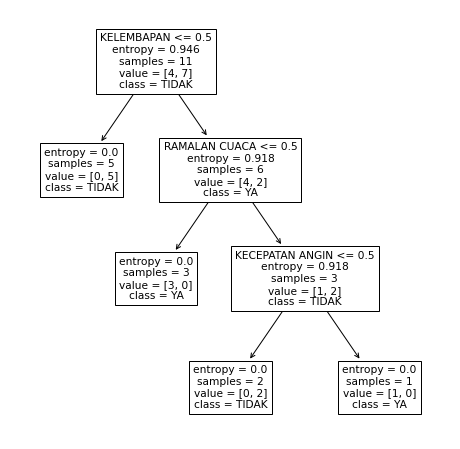

In [36]:
plt.figure(figsize=(8, 8))
plot_tree(model, feature_names=["KECEPATAN ANGIN", "KELEMBAPAN", "TEMPERATURE","RAMALAN CUACA"], class_names=["YA", "TIDAK"])
plt.savefig('decisiontree.jpg')